## Cadeias de Markov em: Café ou Acarajé

No início desse relatório, temos as funções que serão usadas ao decorrer da solução.

Aqui temos duas soluções: uma calculando o M.L.E de 50 dados (onde o dado procurado está entre eles) e escolhendo o que possui o maior e a segunda pela técnica de Stochastic Hill Climbing.

In [1]:
import numpy as np
from random import random
from time import sleep

# Função que gera um array de 6 posições com números aleatórios
def generate_random_dice():
    numbers = np.array([0, 0, 0, 0, 0, 0], dtype=float)
    for i in range(len(numbers)):
        numbers[i] = random()
    sum_numbers = sum(numbers)
    for i in range(len(numbers)):
        numbers[i] = numbers[i] / sum_numbers
    return numbers

# Função que imprime uma matriz
# matrix: matriz a ser impressa
def print_matriz(matrix):
        # Criar labels para as linhas
    labels = np.arange(1, matrix.shape[0] + 1)

    # Imprimir labels das colunas
    print("   ", end="")
    for j in range(matrix.shape[1]):
        print(f"{j+1:5}", end="")
    print()

    # Imprimir matriz com labels das linhas
    for i in range(matrix.shape[0]):
        print(f"{labels[i]:2} |", end="")
        for j in range(matrix.shape[1]):
            print(f"{matrix[i, j]:5.2f}", end="")
        print()

# Roda o algoritmo de Markov
# matrix: matriz de transição inicial
# quantidade: passos de Markov
# printar: se True, imprime as matrizes intermediárias
def rodar_markov(matrix, quantidade, printar=True):
    actual = matrix
    if printar:
        print(f"MATRIZ {1} POSIÇÃO:")
        print_matriz(actual)
    for i in range(1, quantidade):
        if printar:
            print()
            print(f"MATRIZ {i+1} POSIÇÃO:")
        actual = np.dot(actual, matrix)
        if printar:
            print_matriz(actual)
    return actual

# Cria uma matriz considerando as regras do jogo Café ou Acarajé
# array: array com as probabilidades de cada dado
def create_matrix(array):
    return np.array([
    [ 0 , array[0], array[1], array[2], array[3]+array[5], array[4], 0],
    [ 0 , 0, array[0], array[1]+array[5], array[2]+array[4], array[3], 0],
    [ 0 , 0, array[5], array[0]+array[4], array[1]+array[3], array[2], 0],
    [ 0 , 0, 0, 0, 0, 0, 1],
    [array[5], array[4], array[3], array[2], array[1], array[0], 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

def printar_dados(array):
    print(f"1: {array[0]:.2f} \t 2: {array[1]:.2f}\t",
    f"3: {array[2]:.2f} \t 4: {array[3]:.2f} \t"
    f"5: {array[4]:.2f} \t 6: {array[5]:.2f}")

def jogar_dados(quantidade, probabilities):
    data = []
    if abs(probabilities.sum() - 1) > 0.001:
        raise ValueError("Probabilidades devem somar 1")
    for i in range(quantidade):
        posicao = 1
        count = 0
        while True:
            if posicao == 4 or posicao == 6:
                break
            count += 1
            dado = np.random.choice([1, 2, 3, 4, 5, 6], p=probabilities)
            if dado + posicao <= 6:
                posicao += dado
            else:
                posicao = 12 - dado - posicao
        cafe_ou_acaraje = "Café" if posicao == 4 else "Acarajé"
        data.append((count, cafe_ou_acaraje))
    return data

def arrays_sao_iguais(array1, array2):
    # Verifica se os tamanhos são iguais
    if len(array1) != len(array2):
        return False
    
    # Compara os elementos
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            return False
    
    return True

def barrinha(actual, max_value):
    kamin = actual// (int) (max_value*0.1)
    tepan = (max_value-actual)// (int) (max_value*0.1)
    print(kamin * '=' + ">" +  tepan * '#', end="\r")

In [3]:
import numpy as np
from time import sleep
from random import random, choice
from collections import Counter
from matplotlib import pyplot as plt

### Escolhendo entre dados

In [5]:
quantidade_passos = 50
plot_y = np.zeros(quantidade_passos)
plot_x = np.zeros(quantidade_passos)

quantidade_de_dados = 10
passo = 2

In [6]:
for k in range(1,quantidade_passos+1):
    acertos = 0
    for i in range(50):
        
        dados = []
        for i in range(quantidade_de_dados):
            dados.append(generate_random_dice())
        
        dado_escolhido = choice(dados)
        
        jogadas = jogar_dados(passo*k, probabilities=dado_escolhido)
        
        jogadas_unicas = Counter(jogadas)
        
        loglikelihoods = np.zeros(len(dados))
        
        for (quantidade, label), value in jogadas_unicas.items():
            label = 3 if label == "Café" else 5
            for index, dice in enumerate(dados):
                markov = rodar_markov(create_matrix(dice), quantidade=quantidade, printar=False)
                loglikelihoods[index] += np.log(markov[0][label]) * value
        
        max_index = np.argmax(loglikelihoods)

        if arrays_sao_iguais(dados[max_index], dado_escolhido):
            acertos += 1
    plot_y[k-1] = acertos/50
    plot_x[k-1] = passo*k

    barrinha(k, quantidade_passos)

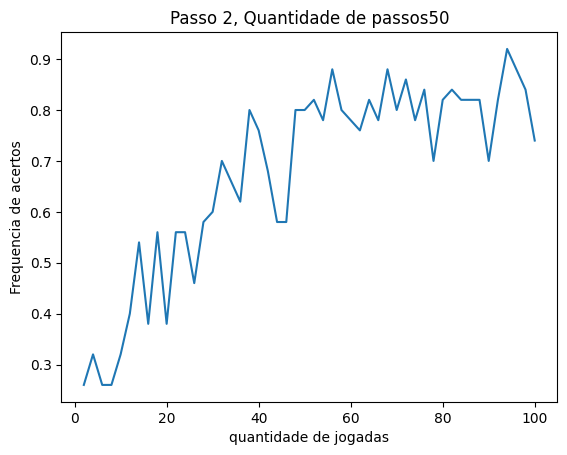

In [7]:
plt.title(f"Passo {passo}, Quantidade de passos{quantidade_passos}")
plt.xlabel("quantidade de jogadas")
plt.ylabel("Frequencia de acertos")
plt.plot(plot_x,plot_y)

In [8]:
print(plot_x)
print(plot_y)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[0.26 0.32 0.26 0.26 0.32 0.4  0.54 0.38 0.56 0.38 0.56 0.56 0.46 0.58
 0.6  0.7  0.66 0.62 0.8  0.76 0.68 0.58 0.58 0.8  0.8  0.82 0.78 0.88
 0.8  0.78 0.76 0.82 0.78 0.88 0.8  0.86 0.78 0.84 0.7  0.82 0.84 0.82
 0.82 0.82 0.7  0.82 0.92 0.88 0.84 0.74]


### Hill Climbing
Nos blocos abaixo, usaremos a técnica chamada Stochastic Hill Climbing para conseguir chegar no melhor Likelihood e estimar o melhor dado. O primeiro bloco simplesmente gera um dado aleatório e joga com ele para gerar dados iniciais.

In [9]:
dado_a_ser_procurado = generate_random_dice()

In [11]:
jogadas = jogar_dados(1000, probabilities=dado_a_ser_procurado)
jogadas_unicas = Counter(jogadas)
jogadas_unicas

Counter({(1, 'Café'): 270,
         (2, 'Café'): 166,
         (2, 'Acarajé'): 151,
         (3, 'Café'): 98,
         (1, 'Acarajé'): 84,
         (3, 'Acarajé'): 83,
         (4, 'Café'): 38,
         (4, 'Acarajé'): 34,
         (5, 'Café'): 21,
         (5, 'Acarajé'): 14,
         (6, 'Café'): 10,
         (6, 'Acarajé'): 6,
         (7, 'Acarajé'): 6,
         (8, 'Café'): 5,
         (7, 'Café'): 4,
         (8, 'Acarajé'): 4,
         (9, 'Café'): 3,
         (10, 'Acarajé'): 1,
         (9, 'Acarajé'): 1,
         (11, 'Acarajé'): 1})

No próximo bloco possuimos 2 funções extremamente importante para a técnica: calcular o log likelihood e a de gerar o próximo vizinho. A primeira será a nossa medida para definir qual vizinho é melhor e a segunda gera um vizinho aleatório na vizinhança.

In [14]:
def calcular_log_likelihood(jogadas, dado):
    loglikelihood = 0
    for (quantidade, label), value in jogadas.items():
        label = 3 if label == "Café" else 5
        markov = rodar_markov(create_matrix(dado), quantidade=quantidade, printar=False)
        loglikelihood += np.log(markov[0][label]) * value
    return loglikelihood

def generate_neighbor(probabilities, step_size=0.05):
    neighbor = probabilities.copy()
    n = len(neighbor)
    
    i, j = np.random.choice(n, 2, replace=False)
    
    adjustment = np.random.uniform(-step_size, step_size)

    if neighbor[i] + adjustment < 0 or neighbor[j] - adjustment < 0:
        adjustment = -adjustment

    # Apply the adjustment
    neighbor[i] += adjustment
    neighbor[j] -= adjustment

    # Ensure the resulting probabilities sum to 1
    assert np.isclose(sum(neighbor), 1.0), "Probabilities do not sum to 1"
    
    return neighbor

Agora, fazemos a execução o Hill Climbing. Escolhemos um dado aleatório para começar nossa busca e a iniciamos da seguinte maneira: calculamos o seu M.L.E. e de  um vizinho. Se o M.L.E do vizinho for maior, ele vira o nosso alvo atual. E assim continuamos até termos testado 100 vizinhos (não necessariamente andado por todos).

In [17]:
from numpy.random import rand
from scipy.stats import entropy
import numpy as np

initial_dice = generate_random_dice()

melhor_loglikelihood = calcular_log_likelihood(jogadas_unicas, initial_dice)

kullback = []
dist_euclidiana = []
passos = [melhor_loglikelihood]

for i in range(100):
    vizinho = generate_neighbor(initial_dice)
    outro_loglikelihood = calcular_log_likelihood(jogadas_unicas, vizinho)
    
    passos.append(melhor_loglikelihood)
    dist_euclidiana.append(np.linalg.norm(initial_dice - dado_a_ser_procurado))
    kullback.append(entropy(dado_a_ser_procurado, initial_dice))
    
    if outro_loglikelihood > melhor_loglikelihood:
        melhor_loglikelihood = outro_loglikelihood
        initial_dice = vizinho
    #print(melhor_loglikelihood)

Nessa parte, fazemos o mesmo hill climbing porém para n dados iniciais diferentes, com o objetivo de fugir de máximos locais e planos.

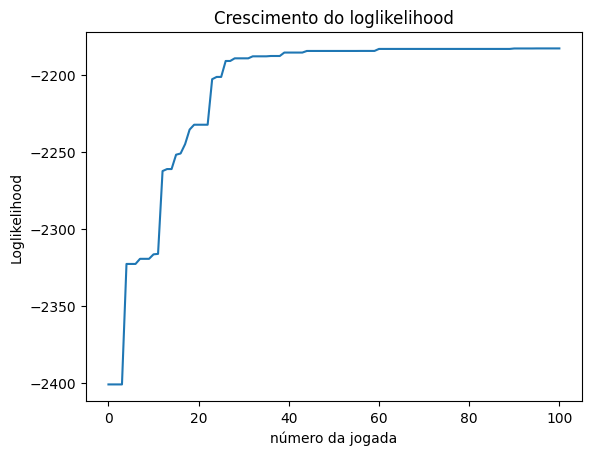

In [20]:
indice = [i for i in range(len(passos))]
plt.title("Crescimento do loglikelihood")
plt.xlabel("número da jogada")
plt.ylabel("Loglikelihood")
plt.plot(indice,passos)

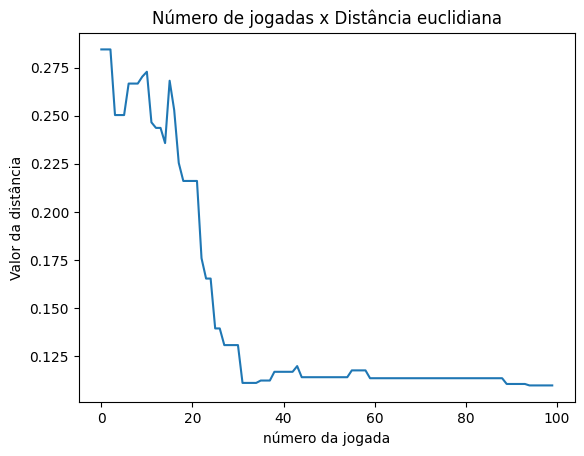

In [22]:
indice = [i for i in range(len(dist_euclidiana))]
plt.title("Número de jogadas x Distância euclidiana")
plt.xlabel("número da jogada")
plt.ylabel("Valor da distância")
plt.plot(indice, dist_euclidiana)

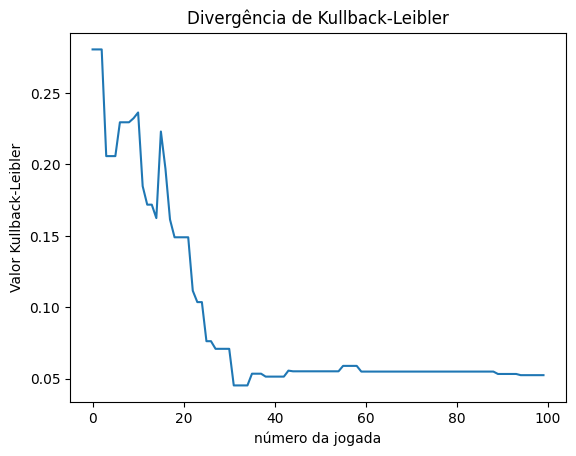

In [24]:
indice = [i for i in range(len(kullback))]
plt.title("Divergência de Kullback-Leibler")
plt.xlabel("número da jogada")
plt.ylabel("Valor Kullback-Leibler")
plt.plot(indice, kullback)

Repetindo o algoritmo do Hill Climbing n vezes:

In [26]:
from numpy.random import rand

dados = []
loglikelihoods = []
kullback = []

for k in range(100):
    initial_dice = generate_random_dice()
    
    melhor_loglikelihood = calcular_log_likelihood(jogadas_unicas, initial_dice)
    
    for i in range(100):
        vizinho = generate_neighbor(initial_dice)
        outro_loglikelihood = calcular_log_likelihood(jogadas_unicas, vizinho)
        
        if outro_loglikelihood > melhor_loglikelihood:
            melhor_loglikelihood = outro_loglikelihood
            initial_dice = vizinho
    dados.append(initial_dice)
    loglikelihoods.append(melhor_loglikelihood)
    kullback.append(entropy(dado_a_ser_procurado, initial_dice))
    barrinha(k, 100-1)

In [27]:
max_index = loglikelihoods.index(max(loglikelihoods))

print("M.L.E. encontrada:\t\t", max(loglikelihoods), "\t" , dados[max_index])
print("M.L.E. do dado procurado:\t", calcular_log_likelihood(jogadas_unicas, dado_a_ser_procurado),"\t" , dado_a_ser_procurado)

M.L.E. encontrada:		 -2182.7393459499153 	 [0.23785178 0.13436164 0.27073753 0.20112594 0.08341368 0.07250943]
M.L.E. do dado procurado:	 -2185.7500264954147 	 [0.26878512 0.05470771 0.27700071 0.14637587 0.06731259 0.18581799]


O gráfico abaixo apresenta momentos em que houve máximos, regiões de planíce ou azar durante a busca do melhor dado.

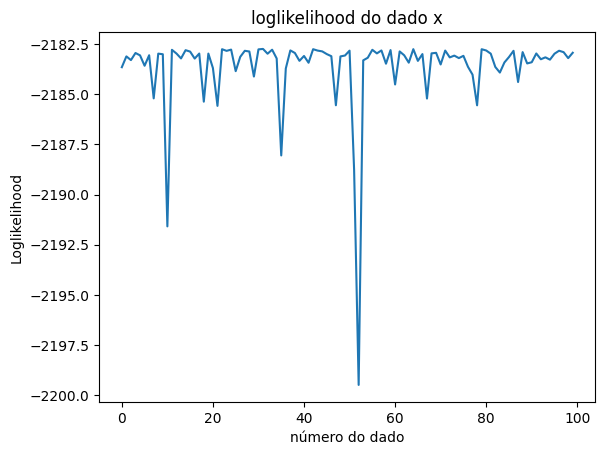

In [29]:
indice = [i for i in range(len(loglikelihoods))]
plt.title("loglikelihood do dado x")
plt.xlabel("número do dado")
plt.ylabel("Loglikelihood")
plt.plot(indice, loglikelihoods)

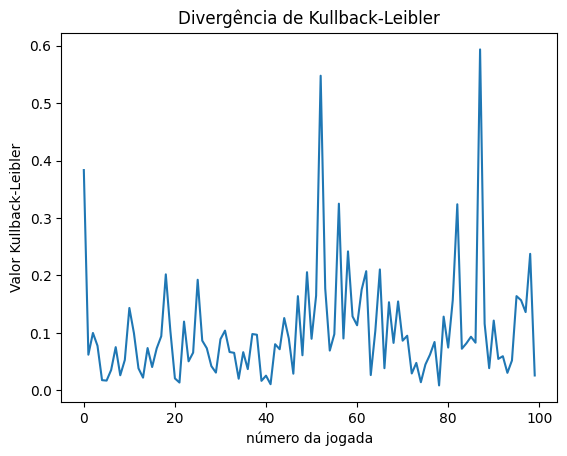

In [33]:
indice = [i for i in range(len(kullback))]
plt.title("Divergência de Kullback-Leibler")
plt.xlabel("número da jogada")
plt.ylabel("Valor Kullback-Leibler")
plt.plot(indice, kullback)

In [35]:
import numpy as np
from scipy.stats import entropy

# Log-likelihood values
mle_encontrada = max(loglikelihoods)
mle_dado_procurado = calcular_log_likelihood(jogadas_unicas, dado_a_ser_procurado)

# Probability distributions
prob_encontrada = dados[max_index]
prob_dado_procurado = dado_a_ser_procurado

# Diferença de Log-Likelihood
delta_ll = abs(mle_encontrada - mle_dado_procurado)
print(f"Diferença de Log-Likelihood: {delta_ll}")

# Distância Euclidiana
dist_euclidiana = np.linalg.norm(prob_encontrada - prob_dado_procurado)
print(f"Distância Euclidiana: {dist_euclidiana}")

# Divergência de Kullback-Leibler
kl_divergence = entropy(prob_dado_procurado, prob_encontrada)
print(f"Divergência de Kullback-Leibler: {kl_divergence}")

# M.S.E.
mse = np.mean((prob_encontrada - prob_dado_procurado) ** 2)
print(f"Mean Squared Error: {mse}")

Diferença de Log-Likelihood: 3.0106805454993264
Distância Euclidiana: 0.15308981877643732
Divergência de Kullback-Leibler: 0.10395800152382488
Mean Squared Error: 0.0039060821021670703


### Referências

https://pages.cs.wisc.edu/~jerryzhu/cs540/handouts/hillclimbing.pdf

https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/

https://impa.br/wp-content/uploads/2017/04/10_CBM_75_03.pdf

https://athena.ecs.csus.edu/~gordonvs/180/WeeklyNotes/12A_hillClimbingSimulatedAnnealing.pdf

https://stats.stackexchange.com/questions/47685/calculating-log-likelihood-for-given-mle-markov-chains

https://stackoverflow.com/questions/44565704/how-to-clear-only-last-one-line-in-python-output-console

Por fim, estamos repetindo o procedimento acima 1000 vezes para obter uma c.d.f..

## Hill Climbing para N dados

queremos gerar uma grande amostra plausível e aproximar para uma normal.

In [5]:
def calcular_log_likelihood(jogadas, dado):
    loglikelihood = 0
    for (quantidade, label), value in jogadas.items():
        label = 3 if label == "Café" else 5
        markov = rodar_markov(create_matrix(dado), quantidade=quantidade, printar=False)
        loglikelihood += np.log(markov[0][label]) * value
    return loglikelihood

def generate_neighbor(probabilities, step_size=0.05):
    neighbor = probabilities.copy()
    n = len(neighbor)
    
    i, j = np.random.choice(n, 2, replace=False)
    
    adjustment = np.random.uniform(-step_size, step_size)

    if neighbor[i] + adjustment < 0 or neighbor[j] - adjustment < 0:
        adjustment = -adjustment

    # Apply the adjustment
    neighbor[i] += adjustment
    neighbor[j] -= adjustment

    # Ensure the resulting probabilities sum to 1
    assert np.isclose(sum(neighbor), 1.0), "Probabilities do not sum to 1"
    
    return neighbor

In [7]:
from numpy.random import rand
import numpy as np
from scipy.stats import entropy

quantidade_de_dados_jogados = 100
quantidade_de_vizinhos_visitados = 100
quantidade_de_jogadas = 1000
valor_do_alfa = 0.05 # passo

tamanho_da_amostra = 1000

all_kullback = np.zeros(tamanho_da_amostra)
all_dist_euclidiana = np.zeros(tamanho_da_amostra)
all_delta_ll = np.zeros(tamanho_da_amostra)

for bar in range(tamanho_da_amostra):

    #barrinha(bar, tamanho_da_amostra-1)
    
    dado_a_ser_procurado = generate_random_dice()
    jogadas = jogar_dados(quantidade_de_jogadas, probabilities=dado_a_ser_procurado)
    jogadas_unicas = Counter(jogadas)
    
    dados = []
    loglikelihoods = []
    kullback = []
    
    for k in range(quantidade_de_dados_jogados):
        print(f"{k+bar*quantidade_de_dados_jogados} / {tamanho_da_amostra*quantidade_de_dados_jogados} ({((k+bar*quantidade_de_dados_jogados) / (tamanho_da_amostra*quantidade_de_dados_jogados))*100:.2f})%", end = "\r")
        initial_dice = generate_random_dice()
        
        melhor_loglikelihood = calcular_log_likelihood(jogadas_unicas, initial_dice)
        
        for i in range(quantidade_de_vizinhos_visitados):
            vizinho = generate_neighbor(initial_dice, valor_do_alfa)
            outro_loglikelihood = calcular_log_likelihood(jogadas_unicas, vizinho)
            
            if outro_loglikelihood > melhor_loglikelihood:
                melhor_loglikelihood = outro_loglikelihood
                initial_dice = vizinho
        dados.append(initial_dice)
        loglikelihoods.append(melhor_loglikelihood)
        kullback.append(entropy(dado_a_ser_procurado, initial_dice))
    
    # Log-likelihood values
    mle_encontrada = max(loglikelihoods)
    mle_dado_procurado = calcular_log_likelihood(jogadas_unicas, dado_a_ser_procurado)

    max_index = loglikelihoods.index(max(loglikelihoods))
    
    # Probability distributions
    prob_encontrada = dados[max_index]
    prob_dado_procurado = dado_a_ser_procurado
    
    # Diferença de Log-Likelihood
    delta_ll = abs(mle_encontrada - mle_dado_procurado)
    #print(f"Diferença de Log-Likelihood: {delta_ll}")
    all_delta_ll[bar] = delta_ll
    #all_delta_ll.append(delta_ll)
    
    
    # Distância Euclidiana
    dist_euclidiana = np.linalg.norm(prob_encontrada - prob_dado_procurado)
    all_dist_euclidiana[bar] = dist_euclidiana
    #all_dist_euclidiana.append(dist_euclidiana)
    #print(f"Distância Euclidiana: {dist_euclidiana}")
    
    # Divergência de Kullback-Leibler
    kl_divergence = entropy(prob_dado_procurado, prob_encontrada)
    all_kullback[bar] = kl_divergence
    #all_kullback.append(kl_divergence)
    #print(f"Divergência de Kullback-Leibler: {kl_divergence}")

C:\Users\dimit\AppData\Local\Temp\ipykernel_15164\3528301384.py:6: RuntimeWarning: invalid value encountered in log
  loglikelihood += np.log(markov[0][label]) * value


Média (sem outliers): 0.03983309724888472
Mediana (sem outliers): 0.024287441880335332
Desvio padrão (sem outliers): 0.040781324320801005


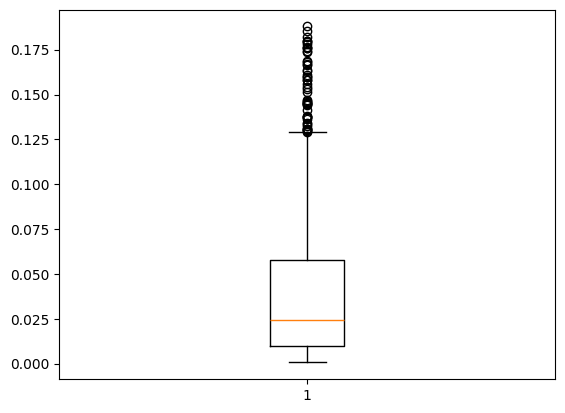

93.32579185520362


In [9]:
from statistics import mean, median, stdev
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de all_kullback
# Calculando Q1, Q3 e IQR
Q1 = np.percentile(all_kullback, 25)
Q3 = np.percentile(all_kullback, 75)
IQR = Q3 - Q1

# Definindo os limites para detecção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os outliers
filtered_kullback = [x for x in all_kullback if lower_bound <= x <= upper_bound]

accept_range = 0.12

# Estatísticas
print("Média (sem outliers):", mean(filtered_kullback))
print("Mediana (sem outliers):", median(filtered_kullback))
print("Desvio padrão (sem outliers):", stdev(filtered_kullback))

# Plotando o boxplot sem outliers
plt.boxplot(filtered_kullback)
plt.title("")
#plt.axhline(y=mean(filtered_kullback), color='r', linestyle='-', linewidth=2, label='Limite em 0.1')

plt.show()

filtered_kullback_sorted = sorted(filtered_kullback)

# Contar observações abaixo de 0.1
count_below_01 = sum(1 for x in filtered_kullback_sorted if x < accept_range)
# Calcular percentual
percent_below_01 = (count_below_01 / len(filtered_kullback_sorted)) * 100
print(percent_below_01)

In [10]:
total_value = 0
for value in filtered_kullback_sorted:
    if total_value / len(filtered_kullback_sorted)< 0.95:
        total_value += 1
    if total_value / len(filtered_kullback_sorted) >= 0.95:
        print(value)
        break
print(value)
total_value

0.13103393522775933
0.13103393522775933


840

In [11]:
media_p = mean(filtered_kullback)
std_p = np.std(filtered_kullback)
import scipy.stats
scipy.stats.norm(loc=media_p, scale=std_p).ppf(0.90)
std_p

0.04075825143390696

In [12]:
media_p = mean(filtered_kullback)
std_p = stdev(filtered_kullback)
import scipy.stats
scipy.stats.norm(loc=media_p, scale=std_p).cdf(0.10)

0.9299413443466509

In [13]:
MSE_kullback = sum([i**2 for i in all_kullback]) / len(all_kullback) 
MSE_kullback

inf

In [14]:
MSE_dist_euclidiana = sum([i**2 for i in all_dist_euclidiana]) / len(all_dist_euclidiana)
MSE_dist_euclidiana

0.013633354349664527

In [15]:
MSE_all_delta_ll = sum([i**2 for i in all_delta_ll]) / len(all_delta_ll)
MSE_all_delta_ll

93.8660924542421

C:\Users\dimit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


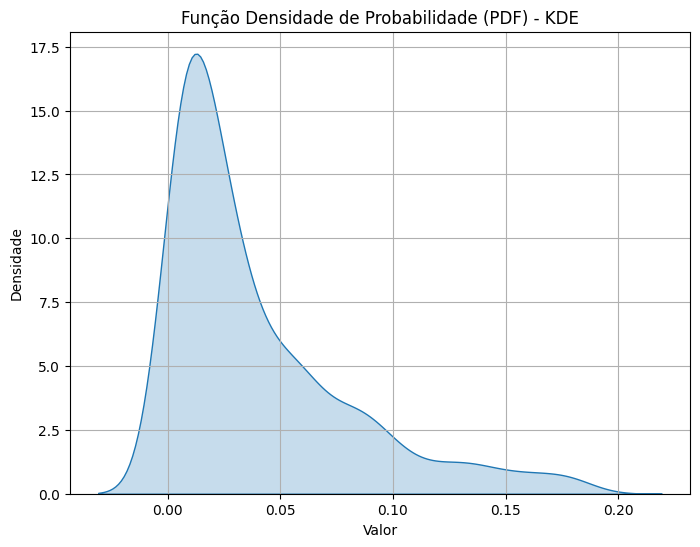

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de conjunto de dados
dados = filtered_kullback  # Gerar 1000 pontos de dados aleatórios de uma distribuição normal

# Plotar o histograma

plt.figure(figsize=(8, 6))
sns.kdeplot(dados, fill=True)
# Adicionar rótulos e título
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title('Função Densidade de Probabilidade (PDF) - KDE')
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

copia = all_kullback

mascara = np.isfinite(copia)

array_transformed = np.nan_to_num(copia, nan=np.nan, posinf=np.nan, neginf=np.nan)

array_sem_infinitos = copia[mascara]

print(array_sem_infinitos)
print(len(array_sem_infinitos))

[1.81804896e-01 4.45057186e-03 2.35702131e-02 1.37853423e-02
 4.87693770e-03 2.12283283e-02 1.80040426e-01 5.76143749e-03
 7.13385883e-03 1.15303441e-02 5.25384800e-02 1.51832447e-02
 1.22570196e-01 6.89670394e-03 6.13621930e-03 2.63561508e-03
 3.85494326e-02 1.42475473e-02 1.63373733e-01 6.55214087e-03
 1.76145630e-02 6.24864499e-02 1.44747239e-03 8.69277052e-03
 8.68485416e-03 7.52806491e-03 7.63348669e-03 3.66488589e-03
 1.53379392e-02 6.74662468e-02 2.91931304e-01 1.18392526e-01
 7.85214972e-02 1.17718937e-02 2.13097795e-02 8.70815776e-03
 1.21950173e-02 1.12988893e-02 1.51434413e-02 6.02118975e-03
 2.42377861e-03 1.06024345e-03 3.57003201e-02 1.31402384e-02
 1.56272209e-02 5.85238080e-02 2.14654048e-02 4.93601596e-02
 1.03555872e-01 6.62244612e-01 8.92474394e-03 2.02479204e-02
 1.81907556e-02 3.58602938e-03 6.81539918e-02 2.48824998e-01
 9.86834487e-03 9.15233160e-03 6.72845185e-02 4.48222087e-03
 3.17343004e-03 6.53301977e-02 3.40520980e-02 1.75689009e-01
 8.75429178e-03 1.852622

In [18]:
import scipy.stats
media_p = np.mean(array_sem_infinitos)
std_p = np.std(array_sem_infinitos)
scipy.stats.norm(loc=media_p, scale=std_p).cdf(0.12)

sem = std_p / np.sqrt(len(array_sem_infinitos))
print(media_p)
print(std_p)
print((0.085- media_p)/sem)
print(f"(0.08 - {media_p}) / ({std_p} / sqrt({len(array_sem_infinitos)}) = {(0.085 - media_p)/sem}")
len(array_sem_infinitos)
print("0.12: ", scipy.stats.norm(loc=media_p, scale=std_p).cdf(0.12))
scipy.stats.norm.fit(array_sem_infinitos)

0.07112178541542777
0.13498318120095296
3.195527080657065
(0.08 - 0.07112178541542777) / (0.13498318120095296 / sqrt(966) = 3.195527080657065
0.12:  0.6413635754687359


(0.07112178541542777, 0.13498318120095296)